In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from utils import constants

# PC anchor

In [5]:
root_dir = os.path.join(constants.RESULTS_DIR, 'motor_LR', 'csp_baseline', 'linear_svm', 'pc', 'bandpass_only', 'randomized')


df = pd.DataFrame()

for directory in ['16_filters']:
    exp_dirs = [d for d in os.listdir(os.path.join(root_dir, directory)) if os.path.isdir(os.path.join(root_dir, directory, d))]

    for d in exp_dirs:
        if d.startswith('no_select'):
            try:
                temp = pd.read_parquet(os.path.join(root_dir, directory, d, 'None_results.parquet'))
                if 'log_var' in d:
                    temp.loc[:, 'selection_method'] = 'CSP variance'
                    window = d.split('_')[-3]
                else:
                    temp.loc[:, 'selection_method'] = 'None'
                    window = d.split('_')[-1]
                temp.loc[:, 'window'] = window
            except:
                continue

        else:
            selection_method = d.split('_')[-1]
            window = d.split('_')[2]
            if selection_method in ['mi', 'pca', 'rfe', 'sfs']:
                selection_method = selection_method.upper()
            try:
                temp = pd.read_parquet(os.path.join(root_dir, directory, d, f'{selection_method}_results.parquet'))
                temp.loc[:, 'selection_method'] = selection_method
                temp.loc[:, 'window'] = window
            except:
                continue

        if 'log_var' in d:
            temp.loc[:, 'log_var_feats'] = True
        else:
            temp.loc[:, 'log_var_feats'] = False


        if 'linear_svm' in d:
            temp.loc[:, 'classifier_type'] = 'linear SVM'
        elif 'rf' in d:
            temp.loc[:, 'classifier_type'] = 'random forest'

        df = df.append(temp, ignore_index=True)
    
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
train_cols = [f'Train {m}' for m in metrics]
valid_cols = [f'Valid {m}' for m in metrics]
test_cols = [f'Test {m}' for m in metrics]

# Sort by column values
window_sorter = ['all', '0', '1', '2', '3', '4', '5', '6', '7']
select_sorter = ['CSP variance', 'None', 'PCA', 'MI']
df.window = df.window.astype('category')
df.window.cat.set_categories(window_sorter, inplace=True)
df.selection_method = df.selection_method.astype('category')
df.selection_method.cat.set_categories(select_sorter, inplace=True)
df.sort_values(['window', 'selection_method'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [6]:
pd.options.display.max_rows = 999
output_df = df[(df['selection_method'] == 'None') & (df['n_filters'] == 16)].groupby(['window', 'montage']).mean()[test_cols]
output_df

Test Accuracy  Test Precision  Test Recall   Test F1
window montage                                                      
all    a             0.490854        0.491033     0.490637  0.486012
       b             0.500269        0.500182     0.499726  0.494592
       c             0.513115        0.513435     0.512925  0.508320
       d             0.509214        0.509347     0.509010  0.506342
       e             0.527690        0.529799     0.528308  0.522667
       f             0.485664        0.486006     0.484940  0.480566
       g             0.498442        0.498290     0.498481  0.493862
       h             0.477545        0.476416     0.477179  0.472234
0      a             0.505880        0.505669     0.505470  0.501825
       b             0.518663        0.518827     0.518104  0.512794
       c             0.496781        0.496222     0.496597  0.491125
       d             0.508381        0.508325     0.508213  0.503960
       e             0.483249        0.482789     0.483018  0.477096
       f             0.478676        0.477929     0.478218  0.473692
       g             0.480425        0.479287     0.480439  0.476564
       h             0.483107        0.482689     0.483942  0.477377
1      a             0.521862        0.521654     0.521797  0.516428
       b             0.491952        0.491341     0.491856  0.487338
       c             0.489981        0.489779     0.490258  0.487003
       d             0.485298        0.484008     0.485326  0.479845
       e             0.521535        0.522698     0.521770  0.516301
       f             0.500314        0.500303     0.500172  0.496410
       g             0.489396        0.488872     0.489402  0.483932
       h             0.513357        0.513150     0.513269  0.508496
2      a             0.506630        0.508211     0.506514  0.501253
       b             0.473806        0.472326     0.473895  0.468258
       c             0.488642        0.488813     0.488511  0.482659
       d             0.500136        0.500822     0.500314  0.496292
       e             0.494025        0.493162     0.493863  0.488113
       f             0.500661        0.500470     0.500534  0.496558
       g             0.509262        0.509906     0.509003  0.505283
       h             0.483168        0.481184     0.482230  0.477515
3      a             0.498019        0.497826     0.497872  0.493761
       b             0.505687        0.505827     0.505292  0.500898
       c             0.491966        0.491329     0.491493  0.487353
       d             0.525168        0.525592     0.525169  0.519559
       e             0.512336        0.512177     0.512222  0.506738
       f             0.501095        0.500377     0.500894  0.497565
       g             0.488945        0.487803     0.488970  0.484700
       h             0.501770        0.501809     0.501984  0.498988
4      a             0.497141        0.496895     0.497058  0.491675
       b             0.490650        0.490613     0.490332  0.483802
       c             0.486064        0.484926     0.485685  0.479559
       d             0.490589        0.489981     0.490531  0.485789
       e             0.491308        0.491269     0.491452  0.483350
       f             0.498575        0.498397     0.498385  0.492878
       g             0.487469        0.486687     0.486890  0.481374
       h             0.500792        0.501829     0.501205  0.496332
5      a             0.488396        0.487326     0.487954  0.482467
       b             0.499976        0.498011     0.499156  0.493358
       c             0.498948        0.498894     0.498643  0.492413
       d             0.503651        0.503906     0.503599  0.499359
       e             0.510945        0.510582     0.510642  0.506633
       f             0.469933        0.468228     0.469592  0.463261
       g             0.510106        0.510610     0.510165  0.504953
       h             0.500439        0.500138     0.500119  0.495572
6      a      

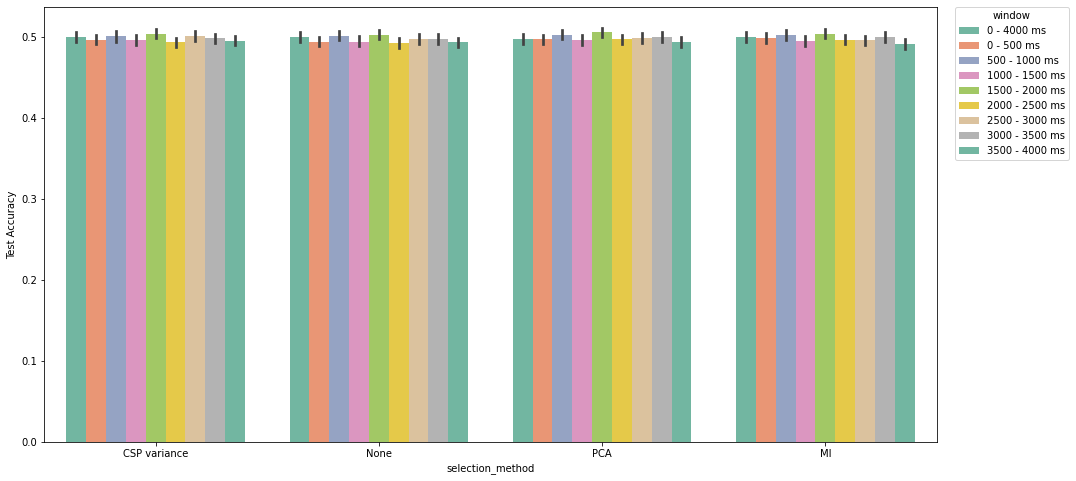

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
window_mapping = {
    'all': '0 - 4000 ms',
    '0': '0 - 500 ms',
    '1': '500 - 1000 ms',
    '2': '1000 - 1500 ms',
    '3': '1500 - 2000 ms',
    '4': '2000 - 2500 ms',
    '5': '2500 - 3000 ms',
    '6': '3000 - 3500 ms',
    '7': '3500 - 4000 ms'
}
plot_df = df.copy()
plot_df['window'].replace(window_mapping, inplace=True)

sns.barplot(data=plot_df[plot_df['n_filters'] == 16], x='selection_method', y='Test Accuracy', hue='window', palette='Set2', ax=ax)
plt.legend(title='window', bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.);

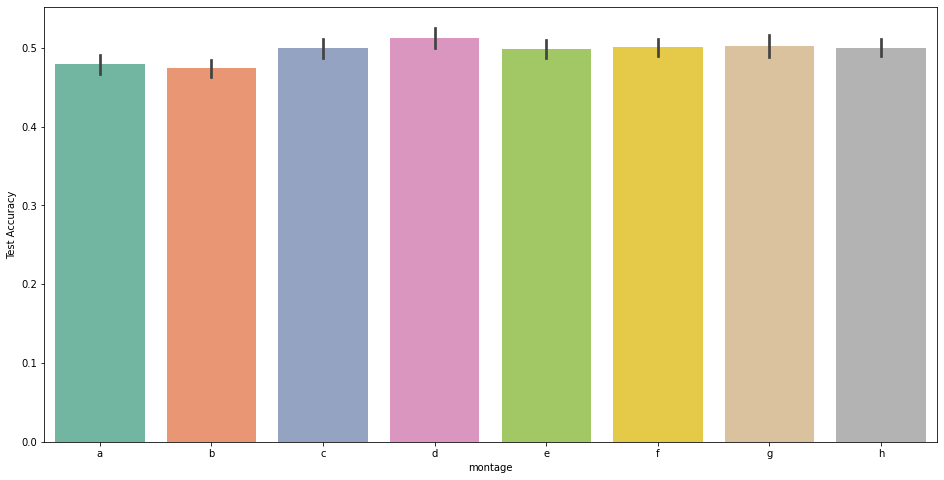

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

sns.barplot(data=df[((df['window'] == '6') | (df['window'] == '7')) & (df['n_filters'] == 16) & (df['selection_method'] == 'None')], x='montage', y='Test Accuracy', palette='Set2', ax=ax);

# RS anchor

In [3]:
root_dir = os.path.join(constants.RESULTS_DIR, 'motor_LR', 'csp_baseline', 'linear_svm', 'rs', 'bandpass_only', 'randomized')


df = pd.DataFrame()

for directory in ['16_filters']:
    exp_dirs = [d for d in os.listdir(os.path.join(root_dir, directory)) if os.path.isdir(os.path.join(root_dir, directory, d))]

    for d in exp_dirs:
        if d.startswith('no_select'):
            try:
                temp = pd.read_parquet(os.path.join(root_dir, directory, d, 'None_results.parquet'))
                if 'log_var' in d:
                    temp.loc[:, 'selection_method'] = 'CSP variance'
                    window = d.split('_')[-3]
                else:
                    temp.loc[:, 'selection_method'] = 'None'
                    window = d.split('_')[-1]
                temp.loc[:, 'window'] = window
            except:
                continue

        else:
            selection_method = d.split('_')[-1]
            window = d.split('_')[2]
            if selection_method in ['mi', 'pca', 'rfe', 'sfs']:
                selection_method = selection_method.upper()
            try:
                temp = pd.read_parquet(os.path.join(root_dir, directory, d, f'{selection_method}_results.parquet'))
                temp.loc[:, 'selection_method'] = selection_method
                temp.loc[:, 'window'] = window
            except:
                continue

        if 'log_var' in d:
            temp.loc[:, 'log_var_feats'] = True
        else:
            temp.loc[:, 'log_var_feats'] = False


        if 'linear_svm' in d:
            temp.loc[:, 'classifier_type'] = 'linear SVM'
        elif 'rf' in d:
            temp.loc[:, 'classifier_type'] = 'random forest'

        df = df.append(temp, ignore_index=True)
    
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
train_cols = [f'Train {m}' for m in metrics]
valid_cols = [f'Valid {m}' for m in metrics]
test_cols = [f'Test {m}' for m in metrics]

# Sort by column values
window_sorter = ['all', '0', '1', '2', '3', '4', '5', '6', '7']
select_sorter = ['CSP variance', 'None', 'PCA', 'MI']
df.window = df.window.astype('category')
df.window.cat.set_categories(window_sorter, inplace=True)
df.selection_method = df.selection_method.astype('category')
df.selection_method.cat.set_categories(select_sorter, inplace=True)
df.sort_values(['window', 'selection_method'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [4]:
pd.options.display.max_rows = 999
df[(df['selection_method'] == 'None') & (df['n_filters'] == 16)].groupby(['window', 'montage']).mean()[test_cols]

Test Accuracy  Test Precision  Test Recall   Test F1
window montage                                                      
all    a             0.522261        0.522657     0.522182  0.519158
       b             0.476688        0.476466     0.476590  0.472310
       c             0.508640        0.508252     0.508066  0.502570
       d             0.529828        0.529852     0.529453  0.524065
       e             0.491560        0.491706     0.491925  0.487312
       f             0.487799        0.486562     0.487664  0.483069
       g             0.487672        0.485766     0.487393  0.482097
       h             0.476461        0.475295     0.475985  0.471226
0      a             0.519551        0.520369     0.518869  0.514952
       b             0.483268        0.480966     0.482558  0.477289
       c             0.500952        0.500907     0.500413  0.495613
       d             0.483171        0.482914     0.483169  0.478047
       e             0.473952        0.473590     0.473611  0.469063
       f             0.490488        0.490509     0.490556  0.483702
       g             0.479011        0.476059     0.478175  0.472384
       h             0.501863        0.502149     0.501532  0.496607
1      a             0.502230        0.501742     0.502194  0.498788
       b             0.501224        0.500481     0.500376  0.494147
       c             0.537528        0.538693     0.537207  0.532103
       d             0.525707        0.530088     0.525232  0.518866
       e             0.503209        0.502784     0.502505  0.494573
       f             0.505695        0.505094     0.505524  0.499346
       g             0.498659        0.497192     0.497870  0.493705
       h             0.490877        0.489526     0.490198  0.486496
2      a             0.507978        0.508405     0.507890  0.500384
       b             0.520618        0.521584     0.520335  0.515756
       c             0.516035        0.516206     0.515766  0.511716
       d             0.507390        0.508762     0.507837  0.501168
       e             0.518681        0.518233     0.518446  0.514918
       f             0.498617        0.498604     0.498173  0.492480
       g             0.502382        0.503840     0.502264  0.495675
       h             0.482547        0.482139     0.482520  0.477283
3      a             0.495208        0.494335     0.494763  0.489285
       b             0.491844        0.491512     0.491708  0.487316
       c             0.485793        0.485984     0.485516  0.480547
       d             0.485272        0.485043     0.484447  0.476618
       e             0.466010        0.463883     0.465493  0.459197
       f             0.497259        0.496856     0.496976  0.492110
       g             0.489642        0.488815     0.490063  0.484132
       h             0.499598        0.499298     0.499630  0.494870
4      a             0.509691        0.509720     0.509456  0.505937
       b             0.514998        0.514726     0.515068  0.510854
       c             0.508297        0.507844     0.508180  0.503697
       d             0.479435        0.478575     0.479298  0.474020
       e             0.482233        0.480975     0.482083  0.476922
       f             0.490822        0.488915     0.489840  0.485193
       g             0.489933        0.489807     0.489874  0.483965
       h             0.483644        0.482173     0.482383  0.477081
5      a             0.516946        0.516948     0.516504  0.512535
       b             0.490132        0.489151     0.489478  0.483305
       c             0.518530        0.519022     0.518277  0.513913
       d             0.510563        0.510467     0.510514  0.506203
       e             0.519779        0.520528     0.519396  0.516012
       f             0.507675        0.506909     0.507267  0.502091
       g             0.502068        0.502886     0.500958  0.496103
       h             0.478294        0.477345     0.477490  0.473319
6      a      

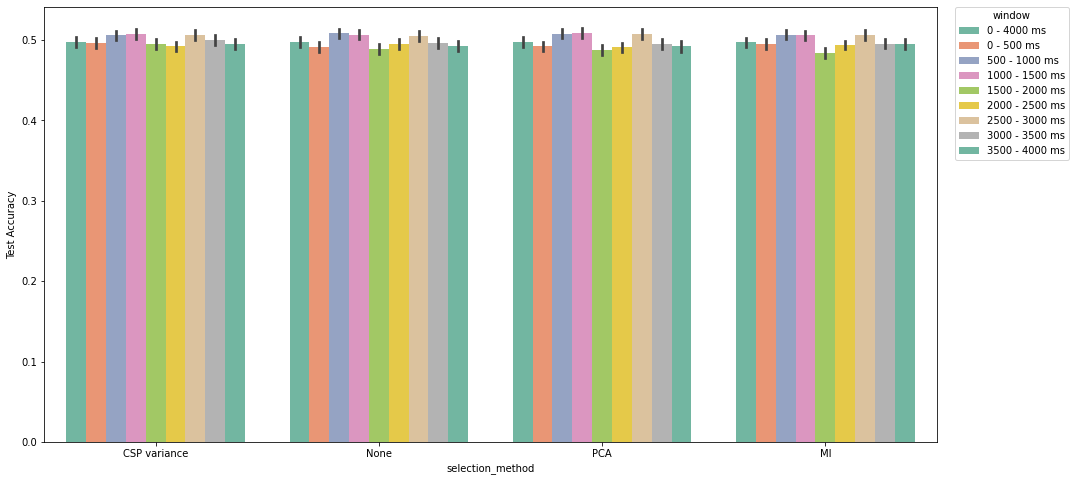

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
window_mapping = {
    'all': '0 - 4000 ms',
    '0': '0 - 500 ms',
    '1': '500 - 1000 ms',
    '2': '1000 - 1500 ms',
    '3': '1500 - 2000 ms',
    '4': '2000 - 2500 ms',
    '5': '2500 - 3000 ms',
    '6': '3000 - 3500 ms',
    '7': '3500 - 4000 ms'
}
plot_df = df.copy()
plot_df['window'].replace(window_mapping, inplace=True)

sns.barplot(data=plot_df[plot_df['n_filters'] == 16], x='selection_method', y='Test Accuracy', hue='window', palette='Set2', ax=ax)
plt.legend(title='window', bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.);

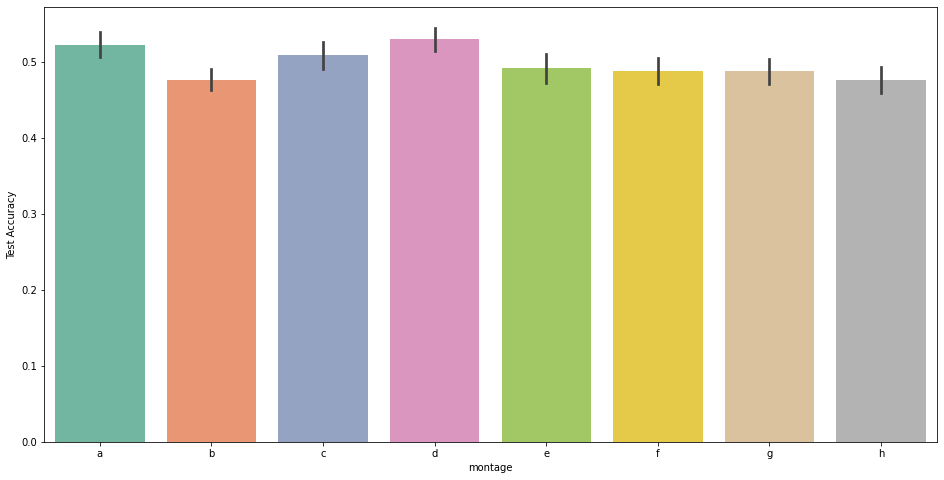

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

sns.barplot(data=df[(df['window'] == 'all') & (df['n_filters'] == 16) & (df['selection_method'] == 'None')], x='montage', y='Test Accuracy', palette='Set2', ax=ax);